# Chapter 8: Linear regression and logistic regression


### 8.1. Regression and classification
> ###### 8.1.1. Reminder about regression
> ###### 8.1.2. Understand the classification

### 8.2. Linear regression
> ###### 8.2.1. Preparation of data
> ###### 8.2.2. Implementation of the model
> ###### 8.2.3. Predictions and backtest

### 8.3. Logistic regression
> ###### 8.3.1. Preparation of data 
> ###### 8.3.2. Implementation of the model
> ###### 8.3.3. Predictions and backtest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from Backtest import *

### 8.2.1. Preparation of data

In [3]:
# Import The data
df = yf.download("EURUSD=X", end="2021-01-10")[["Adj Close"]].pct_change(1)

# Create a X
df["Adj Close t-1"] = df[["Adj Close"]].shift(1)

# Drop missing values
df = df.dropna()

[*********************100%***********************]  1 of 1 completed


In [8]:
# Percentage train set
split = int(0.80*len(df))

# Train set creation
X_train = df[["Adj Close t-1"]].iloc[:split]
y_train = df[["Adj Close"]].iloc[:split]

# Test set creation
X_test = df[["Adj Close t-1"]].iloc[split:]
y_test = df[["Adj Close"]].iloc[split:]

### 8.2.2. Implementation of the model

In [9]:
# Import the class
from sklearn.linear_model import LinearRegression

# Initialize the class
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# This command return the coefficients of the model
lr.coef_

array([[-0.21293679]])

In [11]:
# This command return the intercept of the model
lr.intercept_

array([2.68569594e-05])

### 8.2.3. Predictions and backtest

[*********************100%***********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: -0.0 	 Alpha: -2.33 %	     Sharpe: -0.34 	 Sortino: -0.509
  -----------------------------------------------------------------------------
    VaR: 17.93 %	 cVaR: 20.23 % 	     VaR/cVaR: 1.128 	 drawdown: 21.15 %
  -----------------------------------------------------------------------------


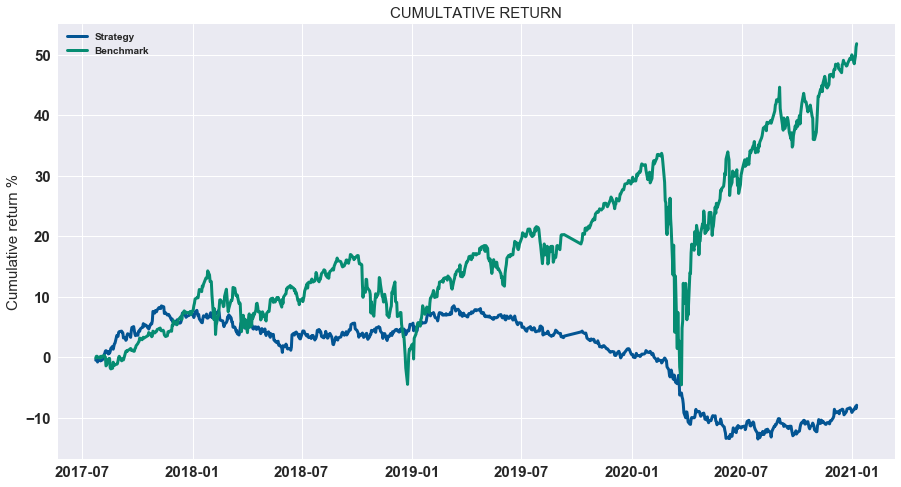

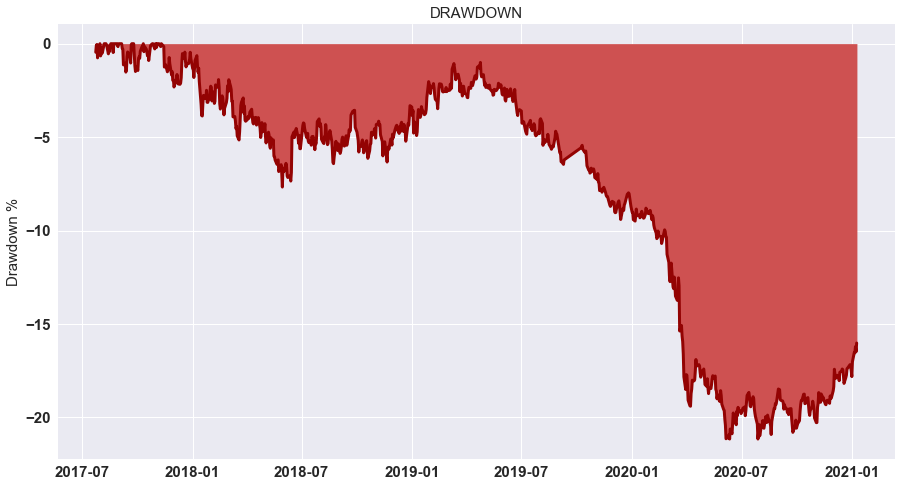

In [12]:
# Create predictions for the whole dataset
df["prediction"] = lr.predict(df[["Adj Close t-1"]])

# Compute the strategy
df["strategy"] = np.sign(df["prediction"]) * df["Adj Close"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[split:], save="Classification")

### 8.3.1. Preparation of data

In [19]:
# Percentage train set
split = int(0.75*len(df))

# Train sets creation
X_train = df[["Adj Close t-1"]].iloc[:split]
y_train = np.round(df[["Adj Close"]].iloc[:split]+0.5)

# Test sets creation
X_test = df[["Adj Close t-1"]].iloc[split:]
y_test = np.round(df[["Adj Close"]].iloc[split:]+0.5)

### 8.3.2. Implementation of the model

In [20]:
# Import the class
from sklearn.linear_model import LogisticRegression

# Initialize the class
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 8.3.3. Predictions and backtest

[*********************100%***********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.055 	 Alpha: 7.27 %	     Sharpe: 0.596 	 Sortino: 1.06
  -----------------------------------------------------------------------------
    VaR: 20.77 %	 cVaR: 24.91 % 	     VaR/cVaR: 1.199 	 drawdown: 29.08 %
  -----------------------------------------------------------------------------


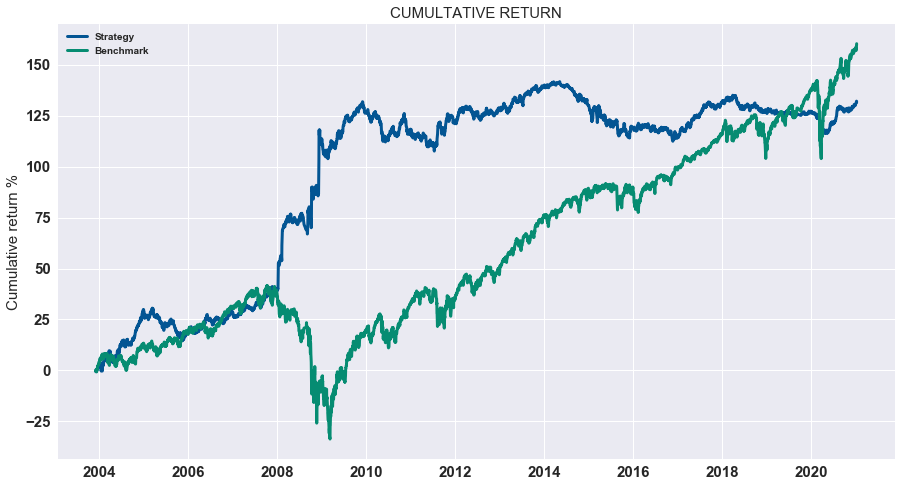

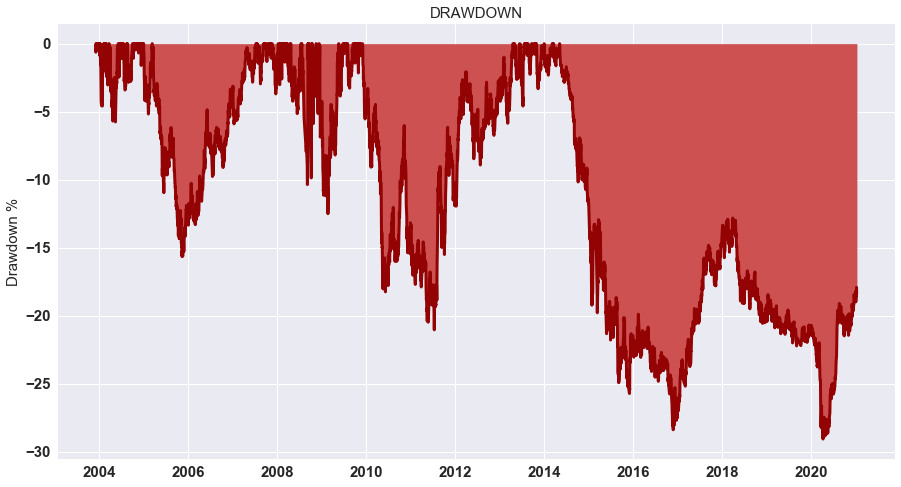

In [21]:
# Create predictions
df["prediction"] = lr.predict(df[["Adj Close t-1"]])

# Create the positions
df["prediction"] = np.where(df["prediction"]==0, -1, 1)

# Compute the returns of the strategy
df["strategy"] = np.sign(df["prediction"]) * df["Adj Close"]
backtest_dynamic_portfolio(df["strategy"])